# Car Price Prediction Using Multi-Layer Perceptron

## Importing required libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/content/car_purchasing.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Read the data file

In [4]:
df=pd.read_csv('car_purchasing.csv',encoding='ISO-8859-1')

## Display the first 5 rows of data

In [5]:
df.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Data Preprocessing: Removing unwanted columns

In [6]:
df.drop(columns=['customer name','customer e-mail','country','gender'],inplace=True)

## View first 3 rows of data after dropping

In [7]:
df.head(3)

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921


## Look for null data

In [8]:
df.isnull().sum()

age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
num_cols=['age','annual Salary','credit card debt','net worth']

## Removing outliers of the data

In [10]:
def remove_outlier(df,col_name):
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    IQR=Q3-Q1
    df_out=df.loc[(df[col_name]>Q1-1.5*IQR)&(df[col_name]<Q3+1.5*IQR)]
    return df_out
df=remove_outlier(df,'age')
df=remove_outlier(df,'credit card debt')
df=remove_outlier(df,'net worth')
df=remove_outlier(df,'annual Salary')

## Preparing data for Training(x) and Testing(y)

In [11]:
x=df.drop(columns='car purchase amount')
y=df['car purchase amount']

## Scaling the data

In [12]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()
x=x_scaler.fit_transform(x)
y=y_scaler.fit_transform(y.values.reshape(-1,1))

## Training and Testing data split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

## Importing tensorflow library for MLP

In [15]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Developing the MLP model

In [16]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

## Model compilation

In [18]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics =['mean_absolute_error'])#,metrics=['mean_absolute_error'])

## Fit the model with Training data

In [31]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 7ms/step - loss: 4.4362e-07 - mean_absolute_error: 5.7863e-04 - val_loss: 3.0440e-05 - val_mean_absolute_error: 0.0019
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 2.9948e-07 - mean_absolute_error: 4.4674e-04 - val_loss: 3.0002e-05 - val_mean_absolute_error: 0.0011
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6463e-08 - mean_absolute_error: 2.1947e-04 - val_loss: 3.0760e-05 - val_mean_absolute_error: 0.0013
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.9551e-07 - mean_absolute_error: 3.9414e-04 - val_loss: 3.2817e-05 - val_mean_absolute_error: 0.0014
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 8.4350e-08 - mean_absolute_error: 2.2574e-04 - val_loss: 3.1877e-05 - val_mean_absolute_error: 0.0011
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 6.6718e-08 - mean_absolute_error: 2.1310e-04 - val_l

## Perform prediction

In [26]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [27]:
y_pred = y_scaler.inverse_transform(y_pred)

## Model Usage

In [28]:
age = input("Enter Age: ")
annual = input("Enter Annual Salary: RM")
ccdebt = input("Enter Credit Card Debt: RM")
worth  = input("Enter Net Worth: RM")

user_input = {
    'age': age,
    'annual Salary': annual,
    'credit card debt': ccdebt,
    'net worth': worth
}

user_df = pd.DataFrame([user_input])
user_input_scaled = x_scaler.transform(user_df)
user_pred_scaled = model.predict(user_input_scaled)
user_pred = y_scaler.inverse_transform(user_pred_scaled)
print("Average Price: RM","%.2f" % user_pred[0][0])


Enter Age: 30
Enter Annual Salary: RM120000
Enter Credit Card Debt: RM1800
Enter Net Worth: RM100000
1/1 [==============================] - 0s 20ms/step
Average Price: RM 55131.38


Finding R2 score of the model

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print("\nR-squared score:", r2)


R-squared score: 0.8395032083937725


Training and validation loss Visualization

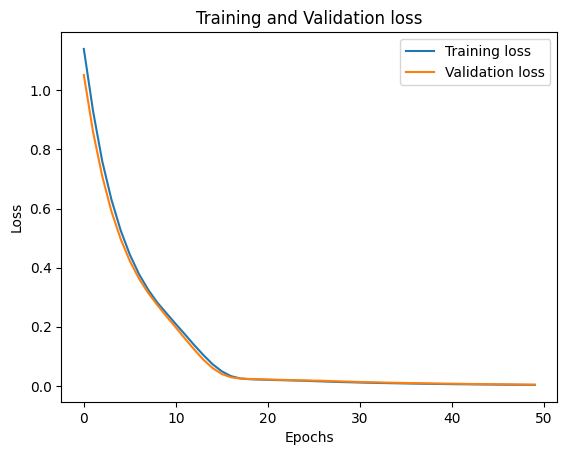

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

Training and Validation Mean Absolute Error Visualization

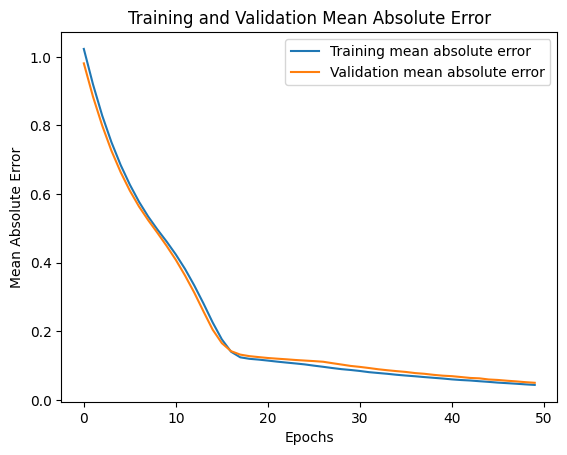

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='Training mean absolute error')
plt.plot(history.history['val_mean_absolute_error'], label='Validation mean absolute error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

Scatter plot for Actual vs. Predicted Values

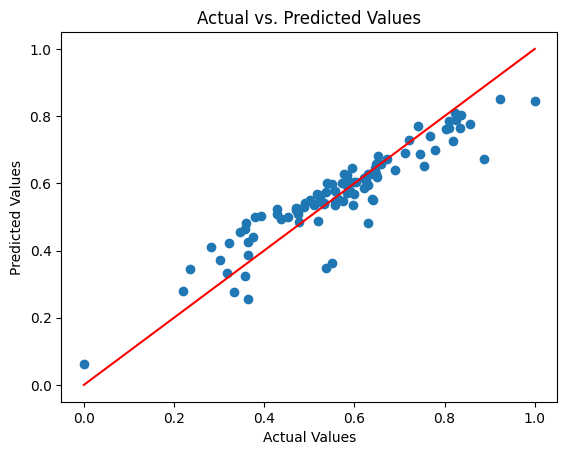

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Add diagonal line for perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()